In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
sinyal_asli=np.loadtxt("0A-1kHz.txt") # specimen 1

In [3]:
sinyal_asli.shape # cek jumlah data

(86652,)

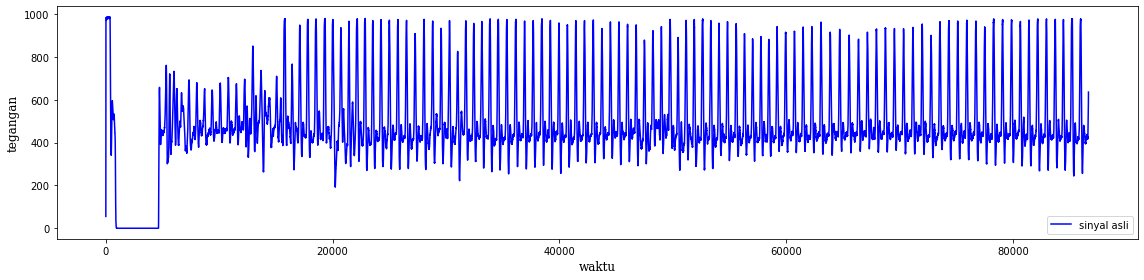

In [4]:
fig = plt.figure(figsize=(16,4))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])
ax1.plot(sinyal_asli,"b-",label="sinyal asli")
ax1.set_xlabel("waktu",family="serif",  fontsize=12)
ax1.set_ylabel("tegangan",family="serif",  fontsize=12)
ax1.legend(loc='best')

fig.tight_layout()
fig.savefig("sinyal-asli.jpg", format="jpg",dpi=65)

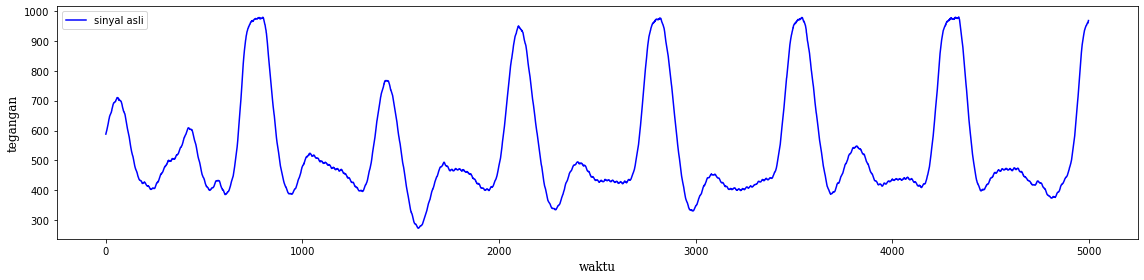

In [19]:
fig = plt.figure(figsize=(16,4))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])
start=15000
delta=5000
ax1.plot(sinyal_asli[start:start+delta,],"b-",label="sinyal asli")
ax1.set_xlabel("waktu",family="serif",  fontsize=12)
ax1.set_ylabel("tegangan",family="serif",  fontsize=12)
ax1.legend(loc='best')
fig.tight_layout()
fig.savefig("sinyal-zoom.jpg", format="jpg",dpi=65)

In [6]:
#analisis frekuensi dengan Fast Fourier Transform
fourierTransform = np.fft.fft(sinyal_asli)/len(sinyal_asli)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(sinyal_asli)/2))] # Exclude sampling frequency

In [7]:
#cek jumlah suku FFT
fourierTransform.shape

(43326,)

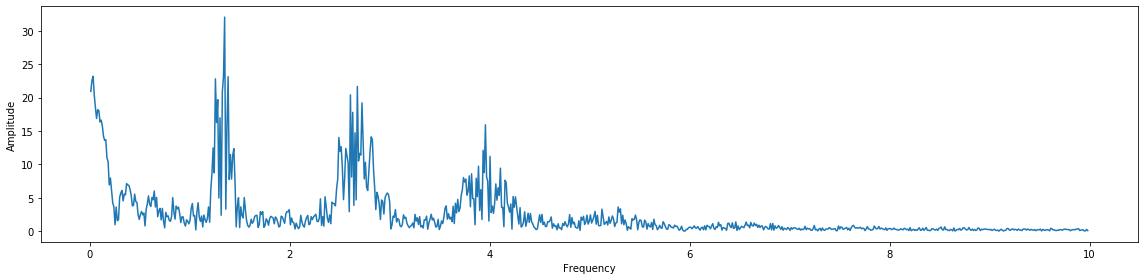

In [8]:
# https://pythontic.com/visualization/signals/fouriertransform_fft
samplingFrequency=1000 # sesuai dengan frekuensi sampling yang dipakai
tpCount     = len(sinyal_asli)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod
 
# Frequency domain representation
fig = plt.figure(figsize=(16,4))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

fourierTransform[0]=0
#ax1.set_title('Fourier transform depicting the frequency components')
start=1
stop=int(10/samplingFrequency*tpCount) # cek spektrum sampai 10 Hz
ax1.plot(frequencies[start:stop], abs(fourierTransform[start:stop]))
#ax1.plot(frequencies[0:480], abs(fourierTransform[0:480]))
#x1.plot(frequencies, abs(fourierTransform))
#ax1.plot(frequencies , abs(fourierTransform))
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Amplitude')

fig.tight_layout()
fig.savefig("spektrum.jpg", format="jpg",dpi=65)

In [9]:
# digital filter calculator: http://www.iowahills.com/8DownloadPage.html
# low pass 4 Hz, max beat 220 bpt = 3,667 Hz

#spesifikasi:
# fc= 3Hz
# sampling 1000 Hz
# stop band: 60.0 dB
# 4 poles
# format: Nth Order Coefficients

#Numerator
b4=  9.815926442284748530E-4
b3=  -3.869204086758032620E-3
b2=  5.775642092592560670E-3
b1=  -3.869204086758032620E-3
b0=  9.815926442284748530E-4

#Denominator
a4=  9.357219426727445110E-1
a3=  -3.805051514176736480E0
a2=  5.802895879380753460E0
a1=  -3.933565888669229070E0
a0=  1.000000000000000000E0


# digital filter calculator: http://www.iowahills.com/8DownloadPage.html
# low pass 4 Hz ,max beat 220 bpt = 3,667 Hz

data_4Hz=np.zeros(sinyal_asli.shape)
counter=0
x0=0
x1=0
x2=0
x3=0
x4=0

y0=0
y1=0
y2=0
y3=0
y4=0

for i in range(0,sinyal_asli.size):
    input=sinyal_asli[i]
    x4=x3
    x3=x2
    x2=x1    
    x1=x0
    x0=input
    
    y4=y3
    y3=y2      
    y2=y1
    y1=y0
    
    y0=x0*b0+x1*b1+x2*b2+x3*b3+x4*b4 - y1*a1-y2*a2-y3*a3-y4*a4
    output=y0
    counter=counter+1
    data_4Hz[i]=output            

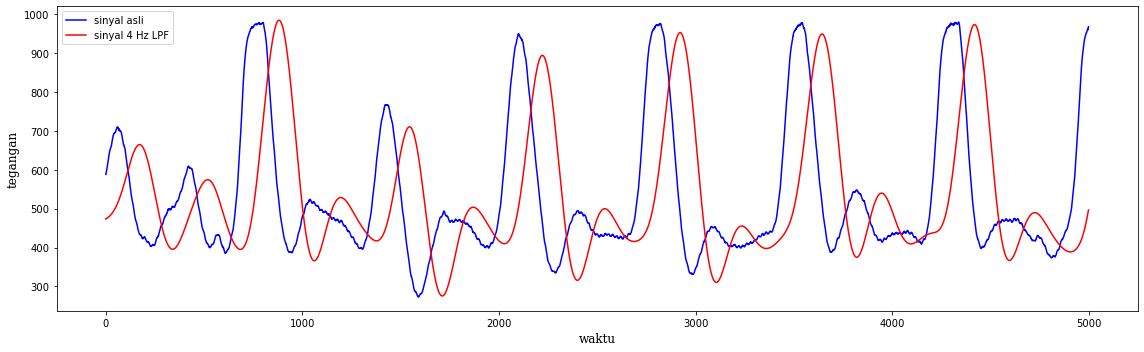

In [10]:
#cek hasil filter LPF 4Hz
fig = plt.figure(figsize=(16,5))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])
# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
label_sinyal="sinyal"

start=15000
delta=5000
ax1.plot(sinyal_asli[start:start+delta,],"b-",label="sinyal asli")
ax1.plot(data_4Hz[start:start+delta,],"r-",label="sinyal 4 Hz LPF")
#ax1.plot(data_1Hz[start:start+delta,],"g-",label="sinyal setelah 1 Hz LPF")

ax1.set_xlabel("waktu",family="serif",  fontsize=12)
ax1.set_ylabel("tegangan",family="serif",  fontsize=12)
ax1.legend(loc='best')

fig.tight_layout()
fig.savefig("sinyal-LPF-4Hz.jpg", format="jpg",dpi=65)

In [11]:
# bikin rata-rata dengan LPF 0.2 Hz, untuk menghitung DC offset
sinyal_200mHz=np.zeros(sinyal_asli.shape)
counter=0
x0=0
x1=0
x2=0
y0=0
y1=0
y2=0
 
# 0.2 Hz, 2 poles
a0=   1.000000000000000000
a1=   -1.998231663137895130
a2=   0.998233226825877784
b0=   0.000999507144815599
b1=   -0.001997450601648498
b2=   0.000999507144815599

for i in range(0,sinyal_200mHz.size):
    input=sinyal_asli[i]
    x2=x1    
    x1=x0
    x0=input
    y2=y1
    y1=y0
    y0=x0*b0+x1*b1+x2*b2-y1*a1-y2*a2
    output=y0
    counter=counter+1
    sinyal_200mHz[i]=output

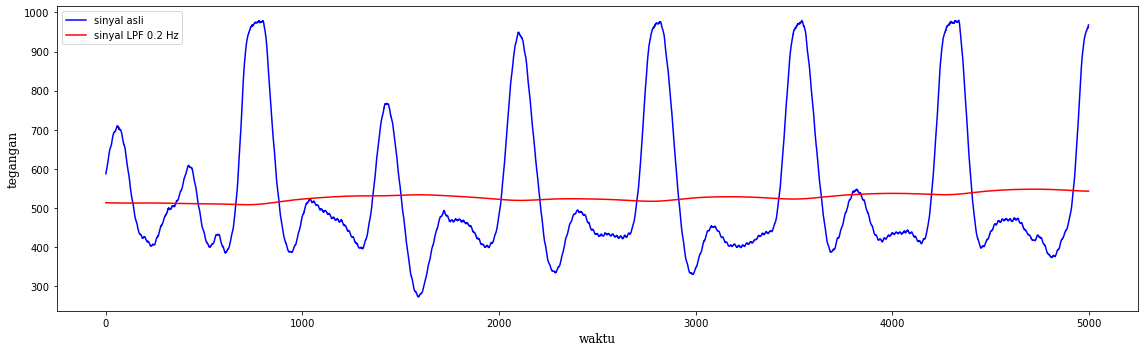

In [12]:
#cek hasil filter LPF 0.2 Hz
fig = plt.figure(figsize=(16,5))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])
# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
label_sinyal="sinyal"

start=15000
delta=5000
ax1.plot(sinyal_asli[start:start+delta,],"b-",label="sinyal asli")
ax1.plot(sinyal_200mHz[start:start+delta,],"r-",label="sinyal LPF 0.2 Hz")

ax1.set_xlabel("waktu",family="serif",  fontsize=12)
ax1.set_ylabel("tegangan",family="serif",  fontsize=12)
ax1.legend(loc='best')

fig.tight_layout()
fig.savefig("sinyal-LPF-2Hz.jpg", format="jpg",dpi=65)

In [13]:
# deteksi envelope, bikin sinyal baru (normalized) digeser dengan 250mHz sebagai offsetnya

data_offset=np.zeros(sinyal_asli.shape)
data_rectified=np.zeros(sinyal_asli.shape)
for i in range(0,sinyal_asli.size):
    data_offset[i]=data_4Hz[i]-sinyal_200mHz[i]    
data_rectified=abs(data_offset)        

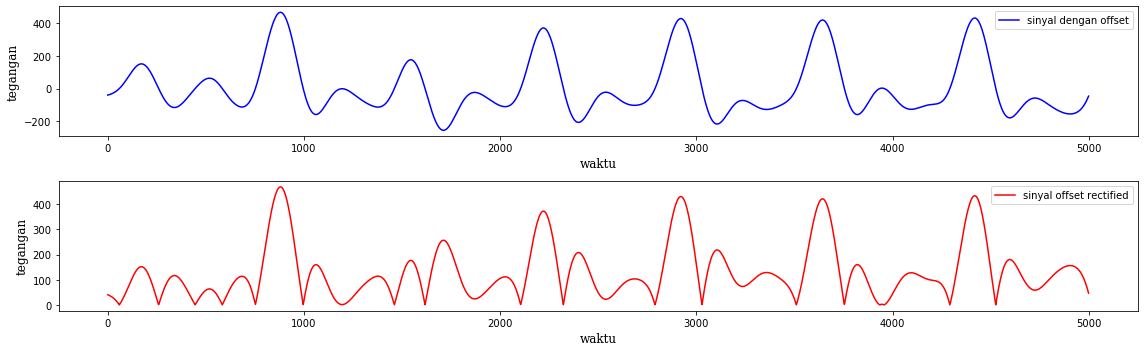

In [14]:
#cek hasil filter LPF 0.2 Hz
fig = plt.figure(figsize=(16,5))
gs = gridspec.GridSpec(2,1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
label_sinyal="sinyal"

start=15000
delta=5000
ax1.plot(data_offset[start:start+delta,],"b-",label="sinyal dengan offset")
ax2.plot(data_rectified[start:start+delta,],"r-",label="sinyal offset rectified")

ax1.set_xlabel("waktu",family="serif",  fontsize=12)
ax1.set_ylabel("tegangan",family="serif",  fontsize=12)
ax1.legend(loc='best')

ax2.set_xlabel("waktu",family="serif",  fontsize=12)
ax2.set_ylabel("tegangan",family="serif",  fontsize=12)
ax2.legend(loc='best')


fig.tight_layout()
fig.savefig("sinyal-LPF-2Hz.jpg", format="jpg",dpi=65)

In [15]:
#sinyal rectified difilter 250 mHz
# bikin rata-rata dengan LPF , envelope
rectified_200mHz=np.zeros(sinyal_asli.shape)
counter=0
x0=0
x1=0
x2=0
y0=0
y1=0
y2=0
 
# 0.2 Hz, 2 poles
a0=   1.000000000000000000
a1=   -1.998231663137895130
a2=   0.998233226825877784
b0=   0.000999507144815599
b1=   -0.001997450601648498
b2=   0.000999507144815599

for i in range(0,sinyal_asli.size):
    input=data_rectified[i]
    x2=x1    
    x1=x0
    x0=input
    y2=y1
    y1=y0
    y0=x0*b0+x1*b1+x2*b2-y1*a1-y2*a2
    output=y0
    counter=counter+1
    rectified_200mHz[i]=output

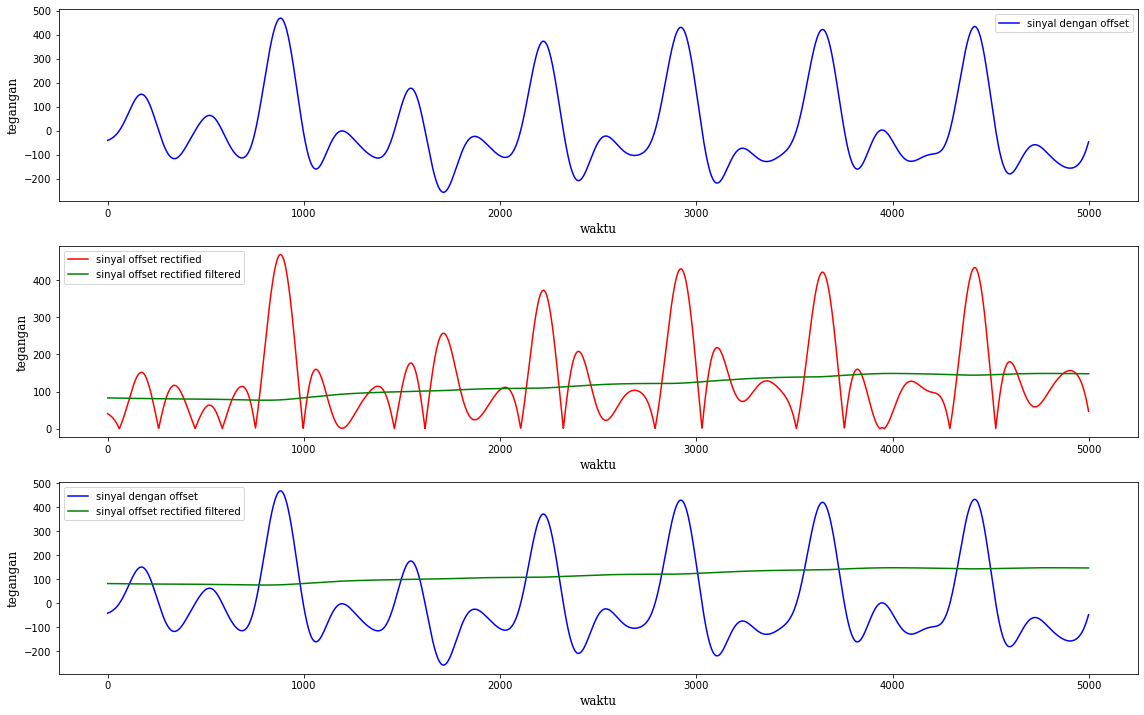

In [16]:
#cek hasil filter LPF 0.2 Hz
fig = plt.figure(figsize=(16,10))
gs = gridspec.GridSpec(3,1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
label_sinyal="sinyal"

start=15000
delta=5000
ax1.plot(data_offset[start:start+delta,],"b-",label="sinyal dengan offset")
ax2.plot(data_rectified[start:start+delta,],"r-",label="sinyal offset rectified")
ax2.plot(rectified_200mHz[start:start+delta,],"g-",label="sinyal offset rectified filtered")


ax1.set_xlabel("waktu",family="serif",  fontsize=12)
ax1.set_ylabel("tegangan",family="serif",  fontsize=12)
ax1.legend(loc='best')

ax2.set_xlabel("waktu",family="serif",  fontsize=12)
ax2.set_ylabel("tegangan",family="serif",  fontsize=12)
ax2.legend(loc='best')

ax3.plot(data_offset[start:start+delta,],"b-",label="sinyal dengan offset")
ax3.plot(rectified_200mHz[start:start+delta,],"g-",label="sinyal offset rectified filtered")
ax3.set_xlabel("waktu",family="serif",  fontsize=12)
ax3.set_ylabel("tegangan",family="serif",  fontsize=12)
ax3.legend(loc='best')

fig.tight_layout()
fig.savefig("sinyal-LPF-2Hz.jpg", format="jpg",dpi=65)

In [17]:
# deteksi puncak sinyal
previous_pulse=0
data_pulsa=np.zeros(sinyal_asli.shape)
for i in range(1,sinyal_asli.size-1):
    if data_offset[i-1]<data_offset[i] and data_offset[i]>data_offset[i+1] and data_offset[i]>rectified_200mHz[i]:
        data_pulsa[i]=60*1000/(i-previous_pulse)
        previous_pulse=i;        
    else:
        data_pulsa[i]=0

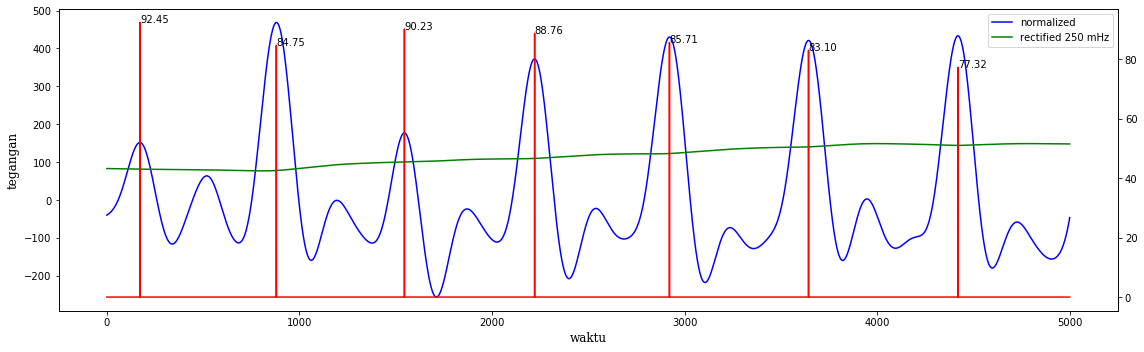

In [18]:
fig = plt.figure(figsize=(16,5))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
label_sinyal="sinyal"

start=15000
delta=5000
ax1.plot(data_offset[start:start+delta,],"b-",label="normalized")
#ax1.plot(data_rectified[start:start+delta,],"y-",label="rectified")
ax1.plot(rectified_200mHz[start:start+delta,],"g-",label="rectified 250 mHz")
ax2.plot(data_pulsa[start:start+delta,],"r-",label="pulsa")

ax1.set_xlabel("waktu",family="serif",  fontsize=12)
ax1.set_ylabel("tegangan",family="serif",  fontsize=12)
ax1.legend(loc='best')

for i in range(1,sinyal_asli.size):
    if data_pulsa[i]>0 and i>start and i<delta+start:
        ax2.annotate('%5.2f'%(data_pulsa[i]),xy=(i-start,data_pulsa[i]))
        
fig.tight_layout()
fig.savefig("normal-1kHz-filter.jpg", format="jpg",dpi=65)    